In [1]:
import numpy as np

np.set_printoptions(linewidth=100)

In [2]:
def npower(matrix, n):
    return np.linalg.matrix_power(matrix, n)

# get unity matrix of size n by n
def get_unity_matrix(n):
    unity_matrix = np.zeros((n,n))
    for i in range(n):
        unity_matrix[i][i] = 1
    return unity_matrix

# get uniform matrix of size n by n
def get_uniform_matrix(n):
    uniform_matrix = np.ones((n,n))
    return uniform_matrix/(n*n)

In [3]:
# given a numpy array, merge certain rows and columns into one row and one column
def compress_matrix(A, index_groups):

    # print(A)

    all_indexes = []
    for group in index_groups:
        all_indexes.extend(group)

    row_merged = np.delete(A, all_indexes, axis=0)

    for group in reversed(index_groups):
        insert_row = np.mean(A[group], axis=0)
        row_merged = np.insert(row_merged, 0, insert_row, axis=0)

    merged = np.delete(row_merged, all_indexes, axis=1)

    for group in reversed(index_groups):
        insert_column = np.sum(row_merged[:,group], axis=1)
        merged = np.insert(merged, 0, insert_column, axis=1)

    # print(merged)

    return merged

def expand_matrix(A, index_groups):

    compressed_matrix_dimension = len(A)
    
    all_indexes = []
    for group in index_groups:
        all_indexes.extend(group)

    expanded_matrix_dimension = compressed_matrix_dimension - len(index_groups) + len(all_indexes)

    row_expanded = np.zeros((expanded_matrix_dimension, compressed_matrix_dimension))

    j = 0
    for i in range(expanded_matrix_dimension):
        if i not in all_indexes:
            row_expanded[i] = A[len(index_groups) + j]
            j += 1
        else:
            for k, group in enumerate(index_groups):
                if i in group:
                    row_expanded[i] = A[k]
                    break

    # print(row_expanded)

    expanded = np.zeros((expanded_matrix_dimension, expanded_matrix_dimension))

    j = 0
    for i in range(expanded_matrix_dimension):
        if i not in all_indexes:
            expanded[:,i] = row_expanded[:,len(index_groups) + j]
            j += 1
        else:
            for k, group in enumerate(index_groups):
                if i in group:
                    expanded[:,i] = row_expanded[:,k]/len(group)
                    break

    # print(np.round(expanded, 3))

    return expanded

In [4]:
def get_rms_diff(A, B):
    # Calculate the squared difference
    diff_squared = (A - B)**2

    # Calculate the mean of the squared difference
    mse = np.mean(diff_squared)

    # Calculate the RMS difference
    rms_diff = np.sqrt(mse)

    return rms_diff

def get_dkl(A, B):

    ratio = np.divide(A,B, out=np.zeros_like(A), where=A!=0)

    # print(ratio)

    lose_information = A * np.log(ratio, out=np.zeros_like(A), where=ratio!=0)
    
    # print(lose_information)

    total_lost = np.sum(lose_information)

    return total_lost

In [5]:
T = np.array([[2/4,1/4,1/4,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [1/4,1/4,0,0,0,1/4,0,0,0,0,0,0,0,0,0,1/4],
              [0,0,3/4,1/4,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,1/4,1/4,0,0,0,1/4,0,0,0,0,0,0,1/4,0],
              [0,0,0,0,2/4,1/4,1/4,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,1/4,1/4,0,1/4,0,1/4,0,0,0,0,0,0],
              [0,0,0,0,0,0,3/4,1/4,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,1/4,2/4,0,0,0,1/4,0,0,0,0],
              [0,0,0,0,0,0,0,0,3/4,0,1/4,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,3/4,0,1/4,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,3/4,1/4,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,1/4,3/4,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,2/4,1/4,1/4,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,1/4,3/4,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,1/4,0,3/4,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]])

print("T")
print(np.round(T, 3))

T_inf = npower(T, 100)
print("T^inf")
print(np.round(T_inf, 3))

T
[[0.5  0.25 0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.25 0.25 0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.25]
 [0.   0.   0.75 0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.25 0.25 0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.25 0.  ]
 [0.   0.   0.   0.   0.5  0.25 0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.25 0.25 0.   0.25 0.   0.25 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.75 0.25 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.25 0.5  0.   0.   0.   0.25 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.75 0.   0.25 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.75 0.   0.25 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.75 0.25 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.75 0.   0.   0.   0.  ]
 [

In [6]:
Tm = compress_matrix(T, [[0,1,2,3,4,5], [6,7],[8,9],[10,11],[12,13,14],[15]])
print("Tm")
print(np.round(Tm, 3))

Tm_prime = expand_matrix(Tm, [[0,1,2,3,4,5], [6,7],[8,9],[10,11],[12,13,14],[15]])
print("Tm_prime")
print(np.round(Tm_prime, 3))

Tm_inf = npower(Tm, 100)
print("Tm^inf")
print(np.round(Tm_inf, 3))

Tm_inf_prime = expand_matrix(Tm_inf, [[0,1,2,3,4,5], [6,7],[8,9],[10,11],[12,13,14],[15]])
print("Tm_inf_prime")
print(np.round(Tm_inf_prime, 3))

Tm
[[0.75  0.125 0.042 0.    0.042 0.042]
 [0.    0.875 0.    0.125 0.    0.   ]
 [0.    0.    0.75  0.25  0.    0.   ]
 [0.    0.    0.    1.    0.    0.   ]
 [0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.    0.    0.    1.   ]]
Tm_prime
[[0.125 0.125 0.125 0.125 0.125 0.125 0.062 0.062 0.021 0.021 0.    0.    0.014 0.014 0.014 0.042]
 [0.125 0.125 0.125 0.125 0.125 0.125 0.062 0.062 0.021 0.021 0.    0.    0.014 0.014 0.014 0.042]
 [0.125 0.125 0.125 0.125 0.125 0.125 0.062 0.062 0.021 0.021 0.    0.    0.014 0.014 0.014 0.042]
 [0.125 0.125 0.125 0.125 0.125 0.125 0.062 0.062 0.021 0.021 0.    0.    0.014 0.014 0.014 0.042]
 [0.125 0.125 0.125 0.125 0.125 0.125 0.062 0.062 0.021 0.021 0.    0.    0.014 0.014 0.014 0.042]
 [0.125 0.125 0.125 0.125 0.125 0.125 0.062 0.062 0.021 0.021 0.    0.    0.014 0.014 0.014 0.042]
 [0.    0.    0.    0.    0.    0.    0.438 0.438 0.    0.    0.062 0.062 0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.438 0.438 0.    0.  

In [7]:
Tm0 = compress_matrix(T, [[0,1,2,3,4,5,6,7,8,9],[10,11],[12,13,14],[15]])
print("Tm0")
print(np.round(Tm0, 3))

Tm0_prime = expand_matrix(Tm0, [[0,1,2,3,4,5,6,7,8,9],[10,11],[12,13,14],[15]])
print("Tm0_prime")
print(np.round(Tm0_prime, 3))

Tm0_inf = npower(Tm0, 100)
print("Tm0^inf")
print(np.round(Tm0_inf, 3))

Tm0_inf_prime = expand_matrix(Tm0_inf, [[0,1,2,3,4,5,6,7,8,9],[10,11],[12,13,14],[15]])
print("Tm0_inf_prime")
print(np.round(Tm0_inf_prime, 3))

Tm0
[[0.875 0.075 0.025 0.025]
 [0.    1.    0.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    0.    1.   ]]
Tm0_prime
[[0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.038 0.038 0.008 0.008 0.008 0.025]
 [0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.038 0.038 0.008 0.008 0.008 0.025]
 [0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.038 0.038 0.008 0.008 0.008 0.025]
 [0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.038 0.038 0.008 0.008 0.008 0.025]
 [0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.038 0.038 0.008 0.008 0.008 0.025]
 [0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.038 0.038 0.008 0.008 0.008 0.025]
 [0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.038 0.038 0.008 0.008 0.008 0.025]
 [0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.038 0.038 0.008 0.008 0.008 0.025]
 [0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.038 0.038 0.008 0.008

In [8]:
Tm1 = compress_matrix(T, [[0,1],[2,3],[4,5,6,7,8,9],[10,11],[12,13,14],[15]])
print("Tm1")
print(np.round(Tm1, 3))

Tm1_prime = expand_matrix(Tm1, [[0,1],[2,3],[4,5,6,7,8,9],[10,11],[12,13,14],[15]])
print("Tm1_prime")
print(np.round(Tm1_prime, 3))

Tm1_inf = npower(Tm1, 100)
print("Tm1^inf")
print(np.round(Tm1_inf, 3))

Tm1_inf_prime = expand_matrix(Tm1_inf, [[0,1],[2,3],[4,5,6,7,8,9],[10,11],[12,13,14],[15]])
print("Tm1_inf_prime")
print(np.round(Tm1_inf_prime, 3))

Tm1
[[0.625 0.125 0.125 0.    0.    0.125]
 [0.    0.75  0.125 0.    0.125 0.   ]
 [0.    0.    0.875 0.125 0.    0.   ]
 [0.    0.    0.    1.    0.    0.   ]
 [0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.    0.    0.    1.   ]]
Tm1_prime
[[0.312 0.312 0.062 0.062 0.021 0.021 0.021 0.021 0.021 0.021 0.    0.    0.    0.    0.    0.125]
 [0.312 0.312 0.062 0.062 0.021 0.021 0.021 0.021 0.021 0.021 0.    0.    0.    0.    0.    0.125]
 [0.    0.    0.375 0.375 0.021 0.021 0.021 0.021 0.021 0.021 0.    0.    0.042 0.042 0.042 0.   ]
 [0.    0.    0.375 0.375 0.021 0.021 0.021 0.021 0.021 0.021 0.    0.    0.042 0.042 0.042 0.   ]
 [0.    0.    0.    0.    0.146 0.146 0.146 0.146 0.146 0.146 0.062 0.062 0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.146 0.146 0.146 0.146 0.146 0.146 0.062 0.062 0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.146 0.146 0.146 0.146 0.146 0.146 0.062 0.062 0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.146 0.146 0.146 0.146 0.146 0.

In [9]:
Tm2 = compress_matrix(T, [[0,1,2,3],[4,5,6],[7,8,9],[10,11],[12,13,14],[15]])
print("Tm2")
print(np.round(Tm2, 3))

Tm2_prime = expand_matrix(Tm2, [[0,1,2,3],[4,5,6],[7,8,9],[10,11],[12,13,14],[15]])
print("Tm2_prime")
print(np.round(Tm2_prime, 3))

Tm2_inf = npower(Tm2, 100)
print("Tm2^inf")
print(np.round(Tm2_inf, 3))

Tm2_inf_prime = expand_matrix(Tm2_inf, [[0,1,2,3],[4,5,6],[7,8,9],[10,11],[12,13,14],[15]])
print("Tm2_inf_prime")
print(np.round(Tm2_inf_prime, 3))

Tm2
[[0.75  0.062 0.062 0.    0.062 0.062]
 [0.    0.75  0.25  0.    0.    0.   ]
 [0.    0.083 0.667 0.25  0.    0.   ]
 [0.    0.    0.    1.    0.    0.   ]
 [0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.    0.    0.    1.   ]]
Tm2_prime
[[0.188 0.188 0.188 0.188 0.021 0.021 0.021 0.021 0.021 0.021 0.    0.    0.021 0.021 0.021 0.062]
 [0.188 0.188 0.188 0.188 0.021 0.021 0.021 0.021 0.021 0.021 0.    0.    0.021 0.021 0.021 0.062]
 [0.188 0.188 0.188 0.188 0.021 0.021 0.021 0.021 0.021 0.021 0.    0.    0.021 0.021 0.021 0.062]
 [0.188 0.188 0.188 0.188 0.021 0.021 0.021 0.021 0.021 0.021 0.    0.    0.021 0.021 0.021 0.062]
 [0.    0.    0.    0.    0.25  0.25  0.25  0.083 0.083 0.083 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.25  0.25  0.25  0.083 0.083 0.083 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.25  0.25  0.25  0.083 0.083 0.083 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.028 0.028 0.028 0.222 0.222 0.

In [10]:
identity_matrix = get_unity_matrix(16)
uniform_matrix = get_uniform_matrix(16)

print("rmsd of T and Tm_prime:", get_rms_diff(T, Tm_prime))
print("rmsd of T and Tm0_prime:", get_rms_diff(T, Tm0_prime))
print("rmsd of T and Tm1_prime:", get_rms_diff(T, Tm1_prime))
print("rmsd of T and Tm2_prime:", get_rms_diff(T, Tm2_prime))
print("rmsd of T and identity_matrix:", get_rms_diff(T, identity_matrix))
print("rmsd of T and uniform_matrix:", get_rms_diff(T, uniform_matrix))

print("dkl of T and Tm_prime:", get_dkl(T, Tm_prime))
print("dkl of T and Tm0_prime:", get_dkl(T, Tm0_prime))
print("dkl of T and Tm1_prime:", get_dkl(T, Tm1_prime))
print("dkl of T and Tm2_prime:", get_dkl(T, Tm2_prime))
print("dkl of T and identity_matrix:", get_dkl(T, identity_matrix))
print("dkl of T and uniform_matrix:", get_dkl(T, uniform_matrix))

rmsd of T and Tm_prime: 0.11206997287161465
rmsd of T and Tm0_prime: 0.13181302848795587
rmsd of T and Tm1_prime: 0.11552642194176477
rmsd of T and Tm2_prime: 0.11669456511670875
rmsd of T and identity_matrix: 0.13621559198564606
rmsd of T and uniform_matrix: 0.1781952301243288
dkl of T and Tm_prime: 10.784891956751753
dkl of T and Tm0_prime: 17.763356711345203
dkl of T and Tm1_prime: 10.921206390655804
dkl of T and Tm2_prime: 10.930619127197494
dkl of T and identity_matrix: inf
dkl of T and uniform_matrix: 75.90639178800319


C:\Users\danie\AppData\Local\Temp\ipykernel_17896\2351144179.py:15: RuntimeWarning: divide by zero encountered in divide
  ratio = np.divide(A,B, out=np.zeros_like(A), where=A!=0)


In [11]:
print("rmsd of T^inf and Tm_^inf_prime:", get_rms_diff(T_inf, Tm_inf_prime))
print("rmsd of T^inf and Tm0_inf_prime:", get_rms_diff(T_inf, Tm0_inf_prime))
print("rmsd of T^inf and Tm1_inf_prime:", get_rms_diff(T_inf, Tm1_inf_prime))
print("rmsd of T^inf and Tm2_inf_prime:", get_rms_diff(T_inf, Tm2_inf_prime))
print("rmsd of T^inf and identity_matrix:", get_rms_diff(T_inf, identity_matrix))
print("rmsd of T^inf and uniform_matrix:", get_rms_diff(T_inf, uniform_matrix))

print("dkl of T^inf and Tm_inf_prime:", get_dkl(T_inf, Tm_inf_prime))
print("dkl of T^inf and Tm0_inf_prime:", get_dkl(T_inf, Tm0_inf_prime))
print("dkl of T^inf and Tm1_inf_prime:", get_dkl(T_inf, Tm1_inf_prime))
print("dkl of T^inf and Tm2_inf_prime:", get_dkl(T_inf, Tm2_inf_prime))
print("dkl of T^inf and identity_matrix:", get_dkl(T_inf, identity_matrix))
print("dkl of T^inf and uniform_matrix:", get_dkl(T_inf, uniform_matrix))

rmsd of T^inf and Tm_^inf_prime: 0.04114253420835115
rmsd of T^inf and Tm0_inf_prime: 0.06270646400248367
rmsd of T^inf and Tm1_inf_prime: 0.010758288700644375
rmsd of T^inf and Tm2_inf_prime: 0.027950849504154954
rmsd of T^inf and identity_matrix: 0.2569325014812786
rmsd of T^inf and uniform_matrix: 0.16272409445608665
dkl of T^inf and Tm_inf_prime: 1.846883811360316
dkl of T^inf and Tm0_inf_prime: 3.947446352175785
dkl of T^inf and Tm1_inf_prime: 0.09716987958910808
dkl of T^inf and Tm2_inf_prime: 0.8012990518081482
dkl of T^inf and identity_matrix: inf
dkl of T^inf and uniform_matrix: 73.59462895490427


C:\Users\danie\AppData\Local\Temp\ipykernel_17896\2351144179.py:15: RuntimeWarning: divide by zero encountered in divide
  ratio = np.divide(A,B, out=np.zeros_like(A), where=A!=0)


Comparison of methods (Random Sizes, By Selection, By Cuts, By Try):

Method: Random Sizes
  (1, 1, 7): Frequency = 210, Possible configurations = 36, ratio = 5.833333333333333
  (1, 2, 6): Frequency = 225, Possible configurations = 252, ratio = 0.8928571428571429
  (1, 3, 5): Frequency = 205, Possible configurations = 504, ratio = 0.40674603174603174
  (1, 4, 4): Frequency = 79, Possible configurations = 315, ratio = 0.2507936507936508
  (2, 2, 5): Frequency = 82, Possible configurations = 378, ratio = 0.21693121693121692
  (2, 3, 4): Frequency = 170, Possible configurations = 1260, ratio = 0.1349206349206349
  (3, 3, 3): Frequency = 29, Possible configurations = 280, ratio = 0.10357142857142858


Method: By Selection
  (1, 1, 7): Frequency = 7, Possible configurations = 36, ratio = 0.19444444444444445
  (1, 2, 6): Frequency = 46, Possible configurations = 252, ratio = 0.18253968253968253
  (1, 3, 5): Frequency = 112, Possible configurations = 504, ratio = 0.2222222222222222
  (1, 4, 

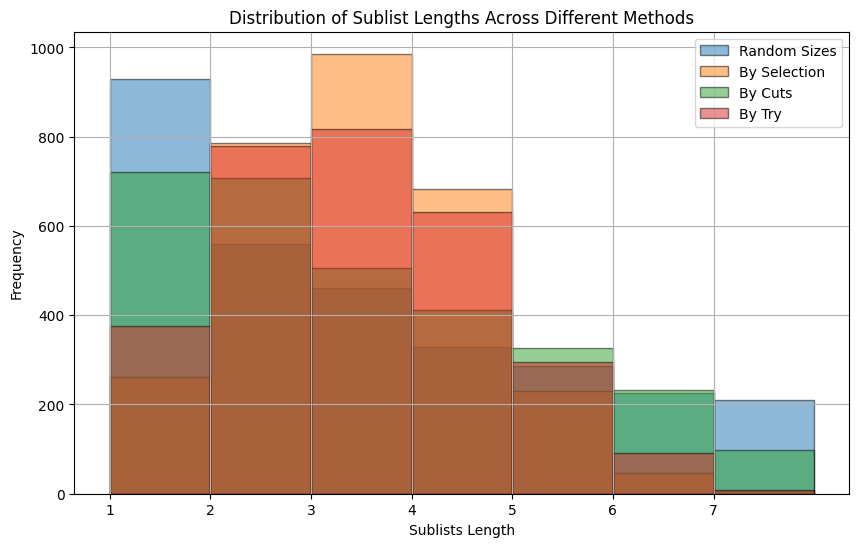

In [12]:
import random
import math
import matplotlib.pyplot as plt
from collections import Counter

# Function to divide list into sublists of random sizes
def divide_list_random_sizes(input_list, N):
    if N <= 0 or N > len(input_list):
        raise ValueError("N must be between 1 and the length of the input list.")
    
    sizes = []
    remaining_items = len(input_list)
    for _ in range(N - 1):
        size = random.randint(1, remaining_items - (N - len(sizes) - 1))  # Ensure each sublist has at least 1 item
        sizes.append(size)
        remaining_items -= size
    
    sizes.append(remaining_items)  # Add the remaining items to the last sublist
    
    # shuffle the input list
    random.shuffle(input_list)

    sublists = []
    start = 0
    for size in sizes:
        sublist = input_list[start:start + size]
        sublists.append(sorted(sublist))
        start += size
    
    # sort the sublists
    sublists.sort()

    return sublists

# Function to divide list into sublists by selecting N items and then distributing remaining items
def divide_list_by_selection(input_list, N):
    if N <= 0 or N > len(input_list):
        raise ValueError("N must be between 1 and the length of the input list.")
    
    selected_items = random.sample(input_list, N)
    remaining_items = [item for item in input_list if item not in selected_items]
    
    sublists = [[item] for item in selected_items]
    
    for item in remaining_items:
        random.choice(sublists).append(item)
    
    sublists = [sorted(sublist) for sublist in sublists]
    # sort the sublists
    sublists.sort()

    return sublists

# Function to divide list into sublists by selecting N-1 cut positions
def divide_list_by_cuts(input_list, N):
    if N <= 0 or N > len(input_list):
        raise ValueError("N must be between 1 and the length of the input list.")
    
    # shuffle the input list
    random.shuffle(input_list)

    cut_positions = sorted(random.sample(range(1, len(input_list)), N - 1))
    sublists = []
    start = 0
    for cut in cut_positions:
        sublist = input_list[start:cut]
        sublists.append(sorted(sublist))
        start = cut
    
    sublists.append(sorted(input_list[start:]))
    
    # sort the sublists
    sublists.sort()

    return sublists

def divide_list_by_try(input_list, N):
    # Check if N is valid
    if N < 1 or N > len(input_list):
        raise ValueError(f"N must be between 1 and the length of the list ({len(input_list)}), inclusive.")
    
    while True:
        # Initialize N empty sublists
        sublists = [[] for _ in range(N)]
        
        # Randomly assign each element to one of the sublists
        for item in input_list:
            random_index = random.randint(0, N-1)
            sublists[random_index].append(item)
        
        # Check if there are any empty sublists
        if all(sublist for sublist in sublists):  # If no sublist is empty
            return sublists

# Function to calculate the number of configurations based on the sublist lengths
def calculate_combinations(lengths):
    total_length = sum(lengths)
    result = math.factorial(total_length)
    
    # order within each sublist is irrelevant
    for length in lengths:
        result //= math.factorial(length)
    
    # sublists of the same length are indistinguishable
    length_distributions = Counter(lengths)
    for length, count in length_distributions.items():
        result //= math.factorial(count)

    return result

# Main function to run all three methods and compare the results
def compare_methods(input_list, N, num_runs=1000):
    # Store the length combinations for each method
    length_combinations_random_sizes = []
    length_combinations_by_selection = []
    length_combinations_by_cuts = []
    length_combinations_by_try = []
    
    # Run each method multiple times and collect sublist lengths
    for _ in range(num_runs):
        # Method 1: Random Sizes
        sublists_random_sizes = divide_list_random_sizes(input_list, N)
        sublist_lengths_random_sizes = [len(sublist) for sublist in sublists_random_sizes]
        length_combinations_random_sizes.append(tuple(sorted(sublist_lengths_random_sizes)))
        
        # Method 2: By Selection
        sublists_by_selection = divide_list_by_selection(input_list, N)
        sublist_lengths_by_selection = [len(sublist) for sublist in sublists_by_selection]
        length_combinations_by_selection.append(tuple(sorted(sublist_lengths_by_selection)))
        
        # Method 3: By Cuts
        sublists_by_cuts = divide_list_by_cuts(input_list, N)
        sublist_lengths_by_cuts = [len(sublist) for sublist in sublists_by_cuts]
        length_combinations_by_cuts.append(tuple(sorted(sublist_lengths_by_cuts)))

        # Method 4: By Try
        sublists_by_try = divide_list_by_try(input_list, N)
        sublist_lengths_by_try = [len(sublist) for sublist in sublists_by_try]
        length_combinations_by_try.append(tuple(sorted(sublist_lengths_by_try)))
    
    # Count the frequencies of length combinations for each method
    length_frequencies_random_sizes = Counter(length_combinations_random_sizes)
    length_frequencies_by_selection = Counter(length_combinations_by_selection)
    length_frequencies_by_cuts = Counter(length_combinations_by_cuts)
    length_frequencies_by_try = Counter(length_combinations_by_try)
    
    # Calculate the number of configurations for each unique combination for each method
    combinations_with_configurations_random_sizes = {}
    combinations_with_configurations_by_selection = {}
    combinations_with_configurations_by_cuts = {}
    combinations_with_configurations_by_try = {}
    
    for combination, frequency in length_frequencies_random_sizes.items():
        configurations = calculate_combinations(combination)
        combinations_with_configurations_random_sizes[combination] = {'frequency': frequency, 'configurations': configurations}
    
    for combination, frequency in length_frequencies_by_selection.items():
        configurations = calculate_combinations(combination)
        combinations_with_configurations_by_selection[combination] = {'frequency': frequency, 'configurations': configurations}
    
    for combination, frequency in length_frequencies_by_cuts.items():
        configurations = calculate_combinations(combination)
        combinations_with_configurations_by_cuts[combination] = {'frequency': frequency, 'configurations': configurations}
    
    for combination, frequency in length_frequencies_by_try.items():
        configurations = calculate_combinations(combination)
        combinations_with_configurations_by_try[combination] = {'frequency': frequency, 'configurations': configurations}

    # sort the combinations_with_configurations by combination
    combinations_with_configurations_random_sizes = dict(sorted(combinations_with_configurations_random_sizes.items()))
    combinations_with_configurations_by_selection = dict(sorted(combinations_with_configurations_by_selection.items()))
    combinations_with_configurations_by_cuts = dict(sorted(combinations_with_configurations_by_cuts.items()))
    combinations_with_configurations_by_try = dict(sorted(combinations_with_configurations_by_try.items()))

    # Output comparison results
    print("Comparison of methods (Random Sizes, By Selection, By Cuts, By Try):\n")
    
    methods = [
        ("Random Sizes", combinations_with_configurations_random_sizes, length_frequencies_random_sizes),
        ("By Selection", combinations_with_configurations_by_selection, length_frequencies_by_selection),
        ("By Cuts", combinations_with_configurations_by_cuts, length_frequencies_by_cuts),
        ("By Try", combinations_with_configurations_by_try, length_frequencies_by_try)
    ]
    
    for method_name, combinations_with_configurations, length_frequencies in methods:
        print(f"Method: {method_name}")
        for combination, data in combinations_with_configurations.items():
            print(f"  {combination}: Frequency = {data['frequency']}, Possible configurations = {data['configurations']}, ratio = {data['frequency'] / data['configurations']}")
        print("\n")
    
    # Plot histogram comparing the distributions of sublist lengths for each method
    all_combinations = [length_combinations_random_sizes, length_combinations_by_selection, length_combinations_by_cuts, length_combinations_by_try]
    method_labels = ["Random Sizes", "By Selection", "By Cuts", "By Try"]
    
    plt.figure(figsize=(10, 6))
    for idx, combinations in enumerate(all_combinations):
        flattened_lengths = [length for lengths in combinations for length in lengths]
        plt.hist(flattened_lengths, bins=range(1, max(flattened_lengths) + 2), edgecolor='black', alpha=0.5, label=method_labels[idx])
    
    plt.title('Distribution of Sublist Lengths Across Different Methods')
    plt.xlabel('Sublists Length')
    plt.ylabel('Frequency')
    plt.legend()
    plt.xticks(range(1, max(flattened_lengths) + 1))
    plt.grid(True)
    plt.show()

# Example input and method parameters
input_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
N = 3  # Number of sublists
num_runs = 1000  # Number of simulations

# Run the comparison
compare_methods(input_list, N, num_runs)


  (1, 1, 8): Frequency = 461, Possible configurations = 45, ratio = 10.244444444444444
  (1, 2, 7): Frequency = 3897, Possible configurations = 360, ratio = 10.825
  (1, 3, 6): Frequency = 9052, Possible configurations = 840, ratio = 10.776190476190477
  (1, 4, 5): Frequency = 13388, Possible configurations = 1260, ratio = 10.625396825396825
  (2, 2, 6): Frequency = 6717, Possible configurations = 630, ratio = 10.661904761904761
  (2, 3, 5): Frequency = 27089, Possible configurations = 2520, ratio = 10.749603174603175
  (2, 4, 4): Frequency = 16946, Possible configurations = 1575, ratio = 10.759365079365079
  (3, 3, 4): Frequency = 22450, Possible configurations = 2100, ratio = 10.69047619047619


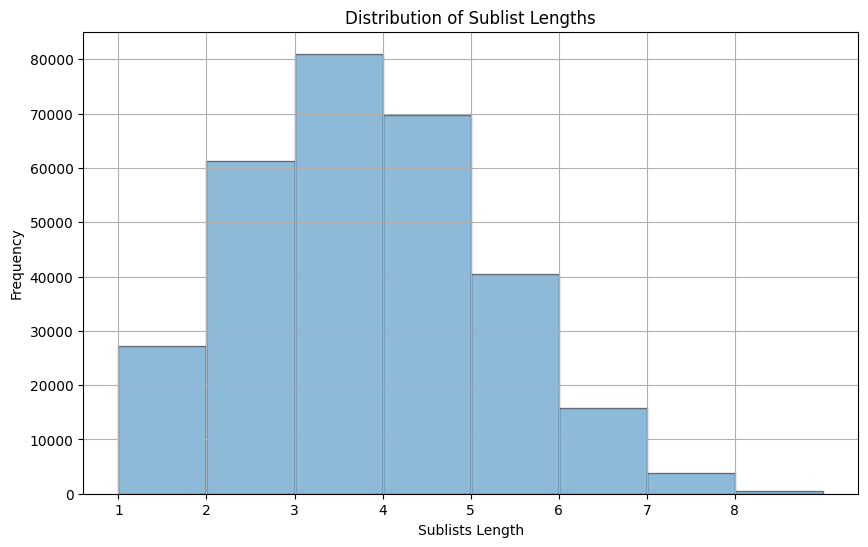

In [13]:
def divide_list_into_sublists(lst, N, m):
    # Check if N is valid
    if N < 1 or N > len(lst):
        raise ValueError(f"N must be between 1 and the length of the list ({len(lst)}), inclusive.")
    
    # Check if m is valid
    if m < 1:
        raise ValueError("m must be at least 1.")
    
    # Check that N * m does not exceed the length of the list
    if N * m > len(lst):
        raise ValueError(f"Not enough elements in the list to create {N} sublists with at least {m} elements each.")
    
    while True:
        # Initialize N empty sublists
        sublists = [[] for _ in range(N)]
        
        # Randomly assign each element to one of the sublists
        for item in lst:
            random_index = random.randint(0, N-1)
            sublists[random_index].append(item)
        
        # Check if all sublists have at least m elements
        if all(len(sublist) >= m for sublist in sublists):  # If no sublist is smaller than m
            return sublists

# Function to calculate the number of configurations based on the sublist lengths
def calculate_combinations(lengths):
    total_length = sum(lengths)
    result = math.factorial(total_length)
    
    # order within each sublist is irrelevant
    for length in lengths:
        result //= math.factorial(length)
    
    # sublists of the same length are indistinguishable
    length_distributions = Counter(lengths)
    for length, count in length_distributions.items():
        result //= math.factorial(count)

    return result

# Main function to run and compare the results with possible combinations
def compare_with_possible_combinations(input_list, N, m, num_runs=1000):
    # Store the length combinations
    length_combinations = []
    
    for _ in range(num_runs):
        sublists = divide_list_into_sublists(input_list, N, m)
        sublist_lengths = [len(sublist) for sublist in sublists]
        length_combinations.append(tuple(sorted(sublist_lengths)))
    
    # Count the frequencies of length combinations
    length_frequencies = Counter(length_combinations)
    
    # Calculate the number of configurations for each unique combination
    combinations_with_configurations = {}

    for combination, frequency in length_frequencies.items():
        configurations = calculate_combinations(combination)
        combinations_with_configurations[combination] = {'frequency': frequency, 'configurations': configurations}

    # sort the combinations_with_configurations by combination
    combinations_with_configurations = dict(sorted(combinations_with_configurations.items()))

    # Output comparison results
    for combination, data in combinations_with_configurations.items():
        print(f"  {combination}: Frequency = {data['frequency']}, Possible configurations = {data['configurations']}, ratio = {data['frequency'] / data['configurations']}")
    
    # Plot histogram comparing the distributions of sublist lengths for each method   
    plt.figure(figsize=(10, 6))

    flattened_lengths = [length for lengths in length_combinations for length in lengths]
    plt.hist(flattened_lengths, bins=range(1, max(flattened_lengths) + 2), edgecolor='black', alpha=0.5)
    
    plt.title('Distribution of Sublist Lengths')
    plt.xlabel('Sublists Length')
    plt.ylabel('Frequency')
    plt.xticks(range(1, max(flattened_lengths) + 1))
    plt.grid(True)
    plt.show()

# Example input and method parameters
input_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
N = 3  # Number of sublists
m = 1  # Minimum number of elements in each sublist
num_runs = 100000  # Number of simulations

# Run the comparison
compare_with_possible_combinations(input_list, N, m, num_runs)

In [14]:
num_runs = 10000

rmsd = []
dkl = []

rmsd_inf = []
dkl_inf = []

for _ in range (num_runs):

    input_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    N = 3  # Number of sublists
    m = 1  # Minimum number of elements in each sublist

    sublists = divide_list_into_sublists(input_list, N, m)

    sublists.extend([[10,11], [12,13,14], [15]])
    # print("sublists")
    # print(sublists)

    TRm = compress_matrix(T, sublists)
    # print("TRm")
    # print(np.round(TRm, 3))

    TRm_prime = expand_matrix(TRm, sublists)
    # print("TRm_prime")
    # print(np.round(TRm_prime, 3))

    TRm_inf = npower(TRm, 100)
    # print("TRm^inf")
    # print(np.round(TRm_inf, 3))

    TRm_inf_prime = expand_matrix(TRm_inf, sublists)
    # print("TRm_inf_prime")
    # print(np.round(TRm_inf_prime, 3))

    # print("rmsd of T and TRm_prime:", get_rms_diff(T, TRm_prime))
    # print("dkl of T and TRm_prime:", get_dkl(T, TRm_prime))

    # print("rmsd of T_inf and TRm_inf_prime:", get_rms_diff(T_inf, TRm_inf_prime))
    # print("dkl of T_inf and TRm_inf_prime:", get_dkl(T_inf, TRm_inf_prime))
    
    rmsd.append(get_rms_diff(T, TRm_prime))
    dkl.append(get_dkl(T, TRm_prime))

    rmsd_inf.append(get_rms_diff(T_inf, TRm_inf_prime))
    dkl_inf.append(get_dkl(T_inf, TRm_inf_prime))

print("average rmsd of T and TRm_prime:", np.mean(rmsd))
print("average dkl of T and TRm_prime:", np.mean(dkl))

print("average rmsd of T_inf and TRm_inf_prime:", np.mean(rmsd_inf))
print("average dkl of T_inf and TRm_inf_prime:", np.mean(dkl_inf))




average rmsd of T and TRm_prime: 0.12281761788711915
average dkl of T and TRm_prime: 14.003862260872943
average rmsd of T_inf and TRm_inf_prime: 0.05532903056792827
average dkl of T_inf and TRm_inf_prime: 3.2425996625436304


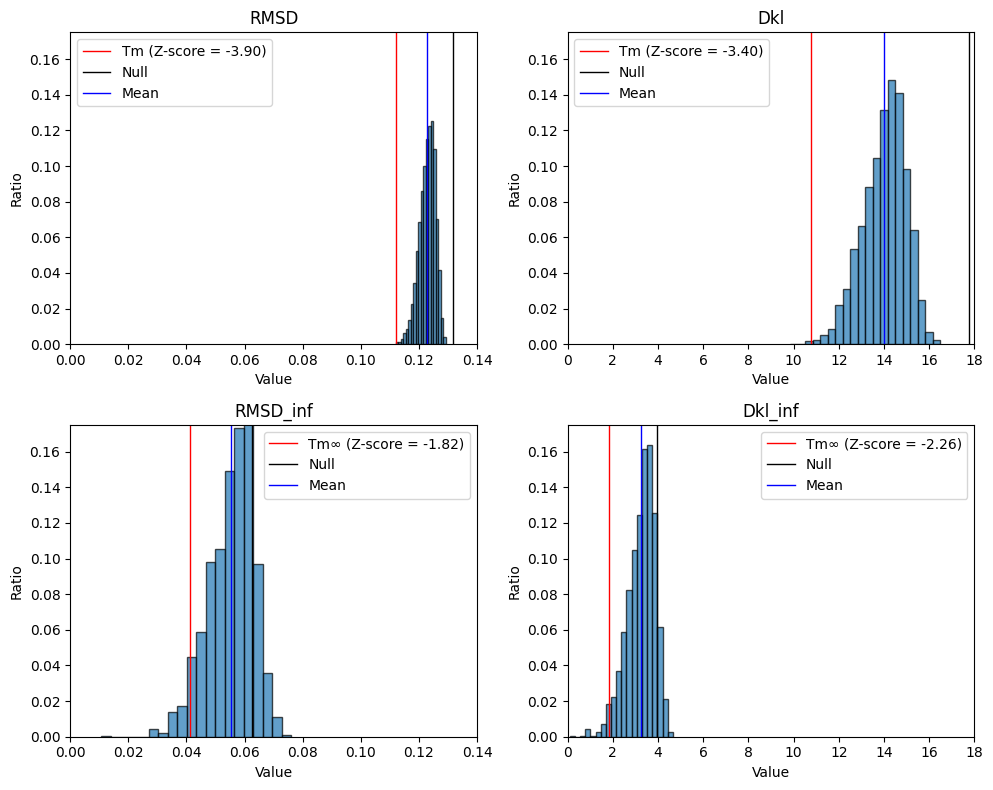

In [15]:
import matplotlib.pyplot as plt

# Sample data for four different lists
data = [np.array(rmsd),
        np.array(dkl),
        np.array(rmsd_inf),
        np.array(dkl_inf)]

# Corresponding reference values
references = [get_rms_diff(T, Tm_prime),
              get_dkl(T, Tm_prime),
              get_rms_diff(T_inf, Tm_inf_prime),
              get_dkl(T_inf, Tm_inf_prime)]

nulls = [get_rms_diff(T, Tm0_prime),
         get_dkl(T, Tm0_prime),
         get_rms_diff(T_inf, Tm0_inf_prime),
         get_dkl(T_inf, Tm0_inf_prime)]

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Loop over each dataset and corresponding reference value
for i, (d, ref, null) in enumerate(zip(data, references, nulls)):
    row, col = divmod(i, 2)  # Determine subplot position
    ax = axs[row, col]

    # Calculate statistics: mean, median, 1st and 3rd quartiles
    # mean = np.mean(d)
    # median = np.median(d)
    # q1 = np.percentile(d, 25)
    # q3 = np.percentile(d, 75)

    # Calculate the mean and standard deviation
    mean = np.mean(d)
    std_dev = np.std(d)

    # Calculate the Z-score of the reference number
    z_score = (ref - mean) / std_dev


    # Create the histogram
    hist, bins = np.histogram(d, bins=20)

    # Calculate the ratio
    ratio = hist / hist.sum()

    if i == 2 or i == 3:
        inf = "∞"
    else:
        inf = ""

    # Plot histogram and reference line
    ax.bar(bins[:-1], ratio, width=np.diff(bins), align='edge', edgecolor='black', alpha=0.7)
    ax.axvline(ref, color='red', linestyle='-', linewidth=1, label=f'Tm{inf} (Z-score = {z_score:.2f})')
    ax.axvline(null, color='black', linestyle='-', linewidth=1, label='Null')
    # Adding lines for mean, median, and quartiles
    ax.axvline(mean, color='blue', linestyle='-', linewidth=1, label='Mean')
    # ax.axvline(median, color='black', linestyle='--', linewidth=1, label='Q1, Q2, Q3')
    # ax.axvline(q1, color='black', linestyle='--', linewidth=1)
    # ax.axvline(q3, color='black', linestyle='--', linewidth=1)


    # Set the labels, limits, and legend for each subplot
    ax.set_xlabel('Value')
    ax.set_ylabel('Ratio')
    # ax.set_xlim(x_min, x_max)
    ax.set_ylim(0, 0.175)
    ax.legend()

axs[0,0].set_title("RMSD")
axs[0,1].set_title("Dkl")
axs[1,0].set_title("RMSD_inf")
axs[1,1].set_title("Dkl_inf")

axs[0,0].set_xlim(0, 0.14)
axs[0,1].set_xlim(0, 18)
axs[1,0].set_xlim(0, 0.14)
axs[1,1].set_xlim(0, 18)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

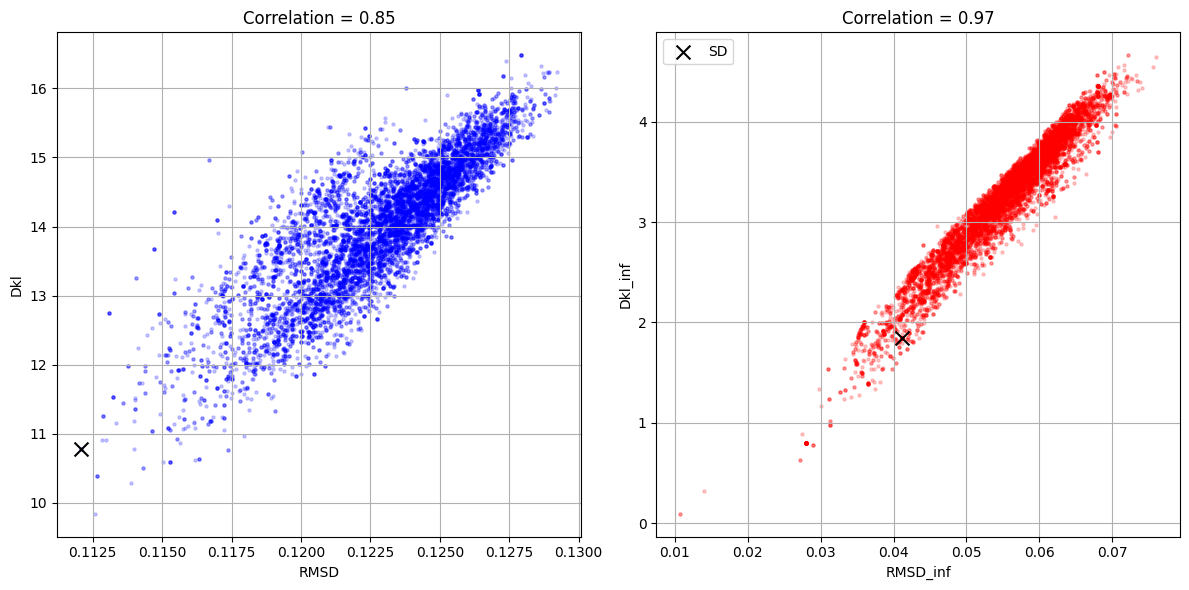

In [16]:
# Calculate the correlation coefficients for both pairs
correlation1 = np.corrcoef(rmsd, dkl)[0, 1]
correlation2 = np.corrcoef(rmsd_inf, dkl_inf)[0, 1]


# Reference points (these are the additional dots with different markers)
ref_x1, ref_y1 = references[0], references[1]  # Reference point for Pair 1
ref_x2, ref_y2 = references[2], references[3]  # Reference point for Pair 2

# Create the figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot (Pair 1)
axes[0].scatter(rmsd, dkl, color='blue', alpha=0.2, s=5)
axes[0].scatter(ref_x1, ref_y1, color='black', s=100, marker='x', label=f'SD')  # Reference point with a star
axes[0].set_title(f'Correlation = {correlation1:.2f}')
axes[0].set_xlabel('RMSD')
axes[0].set_ylabel('Dkl')
axes[0].grid(True)

# Second subplot (Pair 2)
axes[1].scatter(rmsd_inf, dkl_inf, color='red', alpha=0.2, s=5)
axes[1].scatter(ref_x2, ref_y2, color='black', s=100, marker='x', label=f'SD')  # Reference point with a triangle
axes[1].set_title(f'Correlation = {correlation2:.2f}')
axes[1].set_xlabel('RMSD_inf')
axes[1].set_ylabel('Dkl_inf')
axes[1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.legend()
plt.show()